Beta: [2.72684689e+14 4.28785339e+14]
Beta Std Error: [1.40160965e+13 9.58362484e+12]
Beta Covariance: [[ 4.35901921e+27 -2.75399968e+27]
 [-2.75399968e+27  2.03795333e+27]]
Residual Variance: 0.045067698014414966
Inverse Condition #: 0.025182089632486245
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


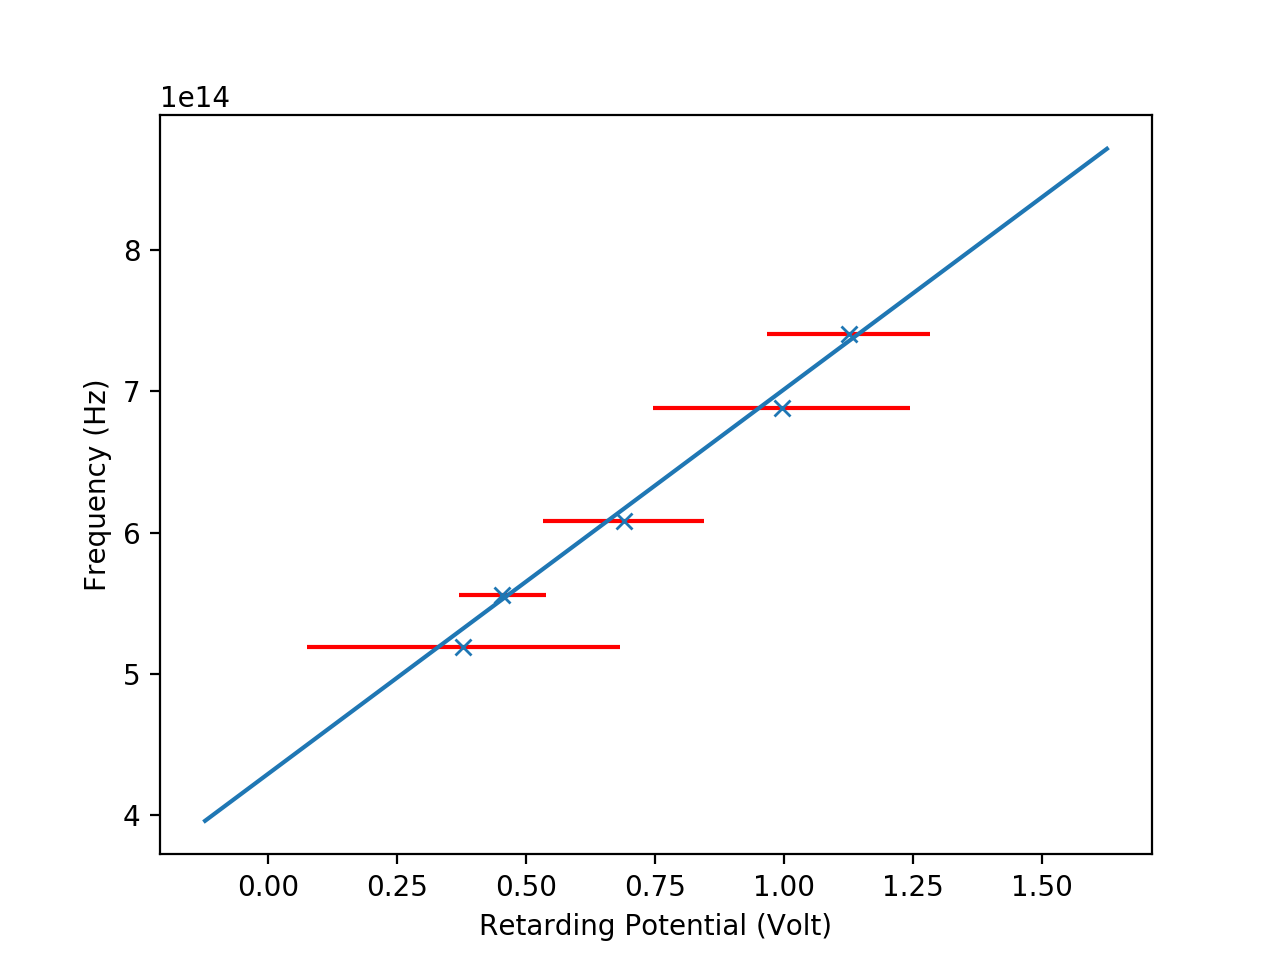

h: 5.8755650178089235e-34
sigma h: 3.020062716228129e-35
W: 2.519356139755606e-19
sigma W: 9.976301534670817e-21


In [58]:
#yel = [0.3782899257855594,0.3030606347947359]
#green =[0.45410066856005177,0.08391985168630223]
#turq = [0.6890779794066331,0.15647378577495694]
#blue=[0.995455284322239,0.24945242343145158]
#violet =[1.1255666680230234,0.1580170824052551]

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.stats import linregress
from scipy.optimize import fsolve
import random


v=[0.3782899257855594,0.45410066856005177,0.6890779794066331,0.995455284322239,1.1255666680230234]
ve=[0.3030606347947359,0.08391985168630223,0.15647378577495694,0.24945242343145158,0.1580170824052551]
f=[5.19e14,5.56e14,6.08e14,6.88e14,7.41e14]
fe=[0.01e14,0.01e14,0.01e14,0.01e14,0.01e14]

def fit_func(p, x):
    m ,c= p
    return m*x+c

linear = Model(fit_func)

data = RealData(v, f, sx=ve, sy=fe)

odr= ODR(data, linear, beta0=[0., 1.])

out = odr.run()

out.pprint()

x_fit = np.linspace(v[0]-0.5, v[-1]+0.5, 1000)
y_fit = fit_func(out.beta, x_fit)

plt.errorbar(v, f, xerr=ve, yerr=fe, linestyle='None', marker='x',ecolor='r')
plt.xlabel('Retarding Potential (Volt)')
plt.ylabel('Frequency (Hz)')
plt.plot(x_fit, y_fit)



plt.show()



print("h:",1.6021766208e-19/out.beta[0])
print("sigma h:",np.sqrt((0.0000000098e-19/out.beta[0])**2+((1.60217662e-19*out.sd_beta[0])/out.beta[0]**2)**2))
print('W:',(1.6021766208e-19*out.beta[1])/out.beta[0])
print("sigma W:",np.sqrt(((out.beta[1]*0.0000000098e-19)/out.beta[0])**2+((out.sd_beta[1]*1.6021766208e-19)/out.beta[0])**2+((1.60217662e-19*out.beta[0]*out.sd_beta[0])/out.beta[0]**2)**2))


plt.savefig('last.jpg')

Beta: [4.36869997e-15 2.00000000e+00]
Beta Std Error: [4.58554708e-17 0.00000000e+00]
Beta Covariance: [[1.09441236e-32 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 0.19213271652859118
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Parameter convergence


<IPython.core.display.Javascript object>


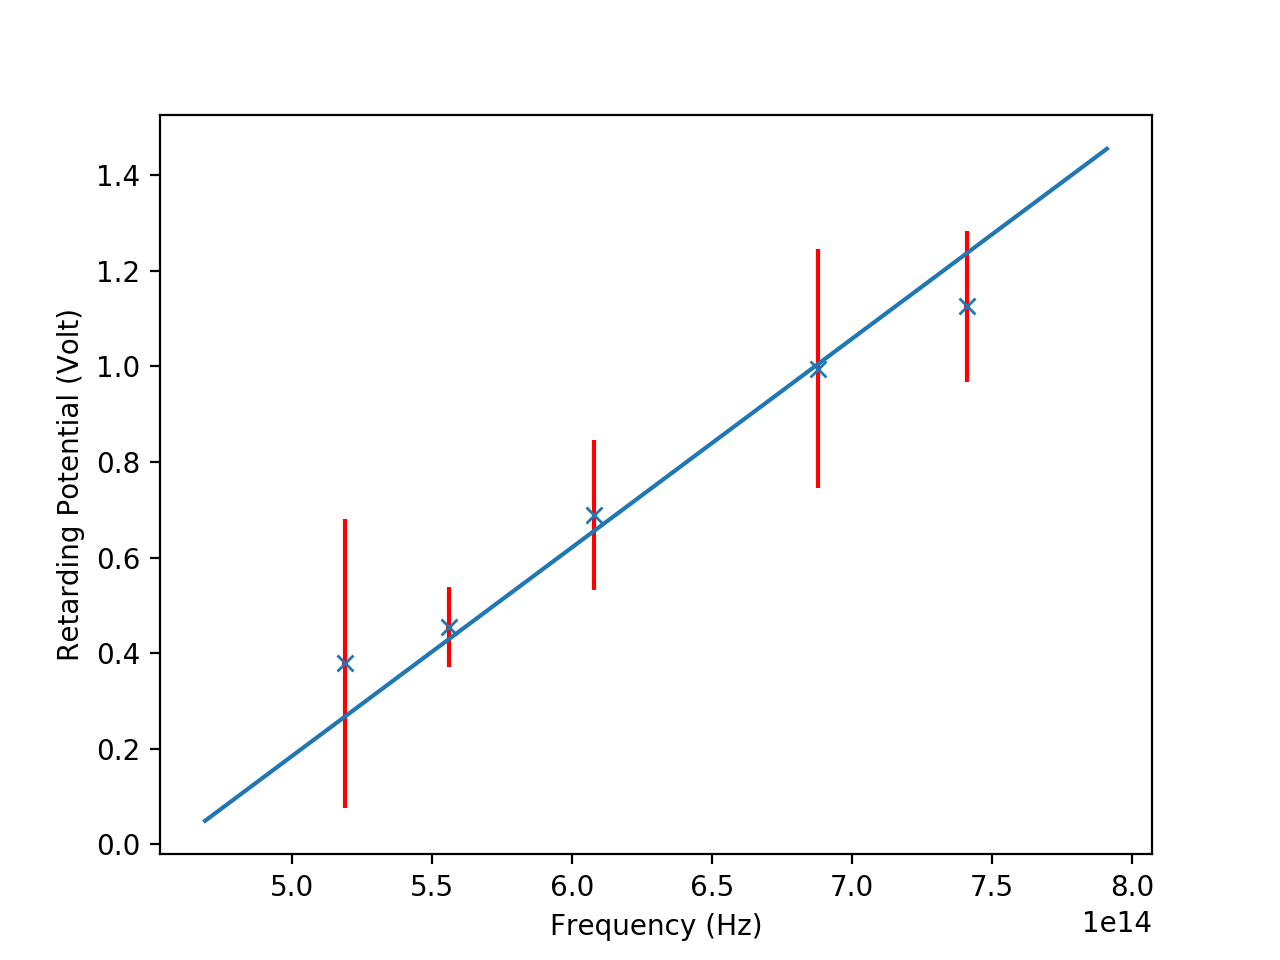

-457802095392680.1
2.0
6.999428950301032e-34
7.34685631398611e-36


In [51]:
5.8755650178089235e-34
3.020062716228107e-35
#yel = [0.3782899257855594,0.3030606347947359]
#green =[0.45410066856005177,0.08391985168630223]
#turq = [0.6890779794066331,0.15647378577495694]
#blue=[0.995455284322239,0.24945242343145158]
#violet =[1.1255666680230234,0.1580170824052551]

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.stats import linregress
from scipy.optimize import fsolve
import random


v=[0.3782899257855594,0.45410066856005177,0.6890779794066331,0.995455284322239,1.1255666680230234]
ve=[0.3030606347947359,0.08391985168630223,0.15647378577495694,0.24945242343145158,0.1580170824052551]
f=[5.19e14,5.56e14,6.08e14,6.88e14,7.41e14]
fe=[0.01e14,0.01e14,0.01e14,0.01e14,0.01e14]

def fit_func(p, x):
    m ,c= p
    return m*x-c

linear = Model(fit_func)

data = RealData(f, v, sx=fe, sy=ve)

odr= ODR(data, linear, beta0=[0., 2.])

out = odr.run()

out.pprint()

x_fit = np.linspace(f[0]-0.5e14, f[-1]+0.5e14, 1000)
y_fit = fit_func(out.beta, x_fit)

plt.errorbar(f, v, xerr=fe, yerr=ve, linestyle='None', marker='x',ecolor='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Retarding Potential (Volt)')
plt.plot(x_fit, y_fit)



plt.show()

print(-out.beta[1]/out.beta[0])   #interception point
print(out.beta[1])

print(1.60217662e-19*out.beta[0])
out.sd_beta[0]
print(1.60217662e-19*abs(out.sd_beta[0]))
plt.savefig('yellow.jpg')